In [1]:
#!pip install -q node2vec
#!pip install -qI gensim
!pip install --user node2vec
!pip install --user gensim
!pip install --user scipy==1.10.1

In [2]:
#!pip install --user scipy

In [3]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from io import BytesIO

%matplotlib inline

In [4]:
# Cargue de los datos
data_set = pd.read_csv(r'C:/Users/camil/OneDrive/Documents/Maestría/Semestre III/Tópicos Avanzados en Analítica/Proyectos/Proyecto 2/Reviews.csv'
                       , delimiter=',', decimal='.')  # Cargar el dataset

In [5]:
data_set = pd.read_csv(r'C:/Users/camil/OneDrive/Documents/Maestría/Semestre III/Tópicos Avanzados en Analítica/Proyectos/Proyecto 2/Reviews.csv', delimiter=',', decimal='.')
data_set

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [6]:
df = data_set

# Muestra las primeras 5 filas del DataFrame
print(df.head())

# Muestra información general sobre el DataFrame
print(df.info())

# Muestra estadísticas descriptivas de las columnas numéricas
print(df.describe())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [7]:
# Contar la frecuencia de cada product_id
product_counts = df['ProductId'].value_counts()

# Extraer los 10 product_id más repetidos
top_10_products = product_counts.head(10)

# Mostrar los resultados
print(top_10_products)

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
B003B3OOPA    623
B001EO5Q64    567
B000VK8AVK    564
B0026KNQSA    564
B007M83302    564
Name: ProductId, dtype: int64


In [8]:
# Contar la frecuencia de cada Score
score_counts = df['Score'].value_counts()

# Crear una tabla de frecuencias
frequency_table = score_counts.reset_index()
frequency_table.columns = ['Score', 'Frequency']

# Ordenar la tabla de frecuencias por Score
frequency_table = frequency_table.sort_values(by='Score')

# Mostrar la tabla de frecuencias
print(frequency_table)

   Score  Frequency
2      1      52268
4      2      29769
3      3      42640
1      4      80655
0      5     363122


In [9]:
# Crear la nueva columna, manejando divisiones por cero
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']

# Opcional: reemplazar los valores infinitos resultantes de la división por cero con NaN
df['HelpfulnessRatio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

df['HelpfulnessRatio'].fillna(0, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


In [10]:
# Definir los rangos
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calcular las frecuencias por rangos
frequency_table = pd.cut(df['HelpfulnessRatio'], bins=bins).value_counts().sort_index()

# Mostrar la tabla de frecuencia por rangos
print(frequency_table)

(0.0, 0.1]       867
(0.1, 0.2]      3255
(0.2, 0.3]      3377
(0.3, 0.4]      7580
(0.4, 0.5]     22883
(0.5, 0.6]      3635
(0.6, 0.7]     12159
(0.7, 0.8]     12920
(0.8, 0.9]      9216
(0.9, 1.0]    188734
Name: HelpfulnessRatio, dtype: int64


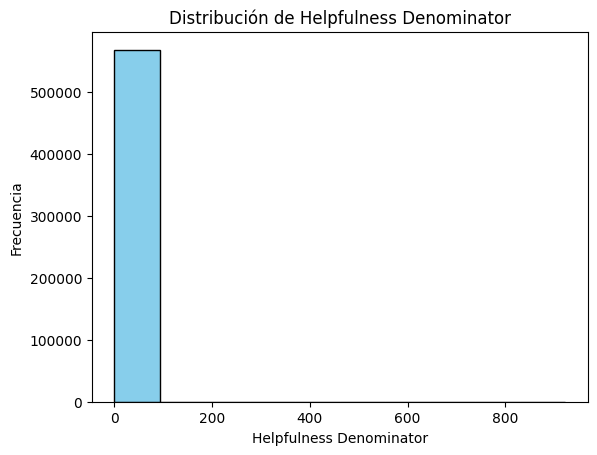

In [11]:
import matplotlib.pyplot as plt

# Crear un histograma de la variable HelpfulnessDenominator
plt.hist(df['HelpfulnessDenominator'], bins=10, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Helpfulness Denominator')
plt.ylabel('Frecuencia')
plt.title('Distribución de Helpfulness Denominator')

# Mostrar la gráfica
plt.show()

In [12]:
# Definir los rangos
bins2 = [0, 5, 10, 20, 50, 100, 500, 1000]

# Calcular las frecuencias por rangos
frequency_table2 = pd.cut(df['HelpfulnessDenominator'], bins=bins2).value_counts().sort_index()

# Mostrar la tabla de frecuencia por rangos
print(frequency_table2)

(0, 5]         245759
(5, 10]         31180
(10, 20]        14279
(20, 50]         5631
(50, 100]        1130
(100, 500]        404
(500, 1000]        19
Name: HelpfulnessDenominator, dtype: int64


In [13]:
print("Antes de la conversión:")
print(df['Time'].head())

# Realizar la conversión
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Mostrar los primeros valores de la columna 'time' después de la conversión
print("Después de la conversión:")
print(df['Time'].head())

Antes de la conversión:
0    1303862400
1    1346976000
2    1219017600
3    1307923200
4    1350777600
Name: Time, dtype: int64
Después de la conversión:
0   2011-04-27
1   2012-09-07
2   2008-08-18
3   2011-06-13
4   2012-10-21
Name: Time, dtype: datetime64[ns]


In [14]:
ratings = df[df.Score >= 4]
ratings

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,0.0
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.0
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,2011-06-15,Very large ground spice jars.,My only complaint is that there's so much of i...,0.0
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,0.0
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0


In [15]:
ratings2 = ratings.sample(n=125000, random_state=42)
ratings2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
45288,45289,B000OV5NBG,A1TC2EXBLUCNQK,Chaz,1,1,5,2012-10-01,Classic by Gano,I have started every morning for the last 7 mo...,1.0
335756,335757,B001E5E2FY,A2SYI1JQ1NBUQ8,Trillian22,3,3,5,2010-10-17,Appropriate for myriads of dishes!,Thank goodness this pasta makes life for a glu...,1.0
318554,318555,B000NGP8UI,A33PF94MA9LH11,HayleyNYC,1,2,5,2008-03-06,Tastes great and makes for a fun night out,I am the type of person who gets tired and sta...,0.5
105294,105295,B001EQ4QJK,A2L4CXG23Z4U3U,BoWiiVille,0,0,5,2012-04-04,Best flavor and best price of any Blue Diamond...,The flavor of these is just amazing. They are ...,0.0
92364,92365,B007TGDXMK,AA10EFTRAL2CK,MrsHomeEc,3,3,5,2012-04-26,great value!,I have been using Coffee People Donut Shop for...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
325433,325434,B005FC6T08,A1QQNRG4ZKR75Y,Sara,0,0,5,2012-09-29,Delicious coconut water,I must admit I was surprised to see food avail...,0.0
344003,344004,B008J1HO4C,A1IU7S4HCK1XK0,Joanna Daneman,10,10,5,2006-11-08,Why do these taste SO good?,"Oats is oats, right? Well, apparently not. The...",1.0
149044,149045,B004Q3LBTG,AAKW9BKL792MX,aburd,1,1,4,2011-09-16,EXTREMELY HAPPY WITH MY DECISION TO BUY BREEZA...,I read review after review trying to decide wh...,1.0
482520,482521,B001EO607I,A2XW3QRJDQWD8J,butterfly beach,0,0,5,2010-01-14,Absolutely Wonderful,I got this at Costco too and have flipped for ...,0.0


In [16]:
from collections import defaultdict
from sklearn.model_selection import train_test_split

# Supongamos que ratings es un DataFrame con 'UserId' y 'ProductId'
pairs = defaultdict(int)

# Dividir los datos en conjunto de entrenamiento, validación y prueba
train_data, temp_data = train_test_split(ratings, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Tomar una fracción del conjunto de entrenamiento para calcular las co-ocurrencias de productos
train_data_subset = train_data.sample(frac=0.8, random_state=42)

# Agrupar por usuario y contar co-ocurrencias de productos en la submuestra de entrenamiento
for user, group in train_data_subset.groupby("UserId"):
    user_products = list(group["ProductId"])

    # Contabilizar cada par de productos comprados por el mismo usuario
    for i in range(len(user_products)):
        for j in range(i+1, len(user_products)):
            pairs[(user_products[i], user_products[j])] += 1

# Verificar la longitud de los conjuntos de entrenamiento, validación y prueba
print("Tamaño del conjunto de entrenamiento:", len(train_data))
print("Tamaño del conjunto de validación:", len(val_data))
print("Tamaño del conjunto de prueba:", len(test_data))

Tamaño del conjunto de entrenamiento: 266266
Tamaño del conjunto de validación: 88755
Tamaño del conjunto de prueba: 88756


In [17]:
# Create a networkx graph
G = nx.Graph()

# Try to create an edge between movies that are liked together
for pair in pairs:
    product1, product2 = pair
    score = pairs[pair]

    # The edge is only created when the score is high enough
    if score >= 5:
        G.add_edge(product1, product2, weight=score)

print("Total number of graph nodes:", G.number_of_nodes())
print("Total number of graph edges:", G.number_of_edges())

Total number of graph nodes: 1809
Total number of graph edges: 4618


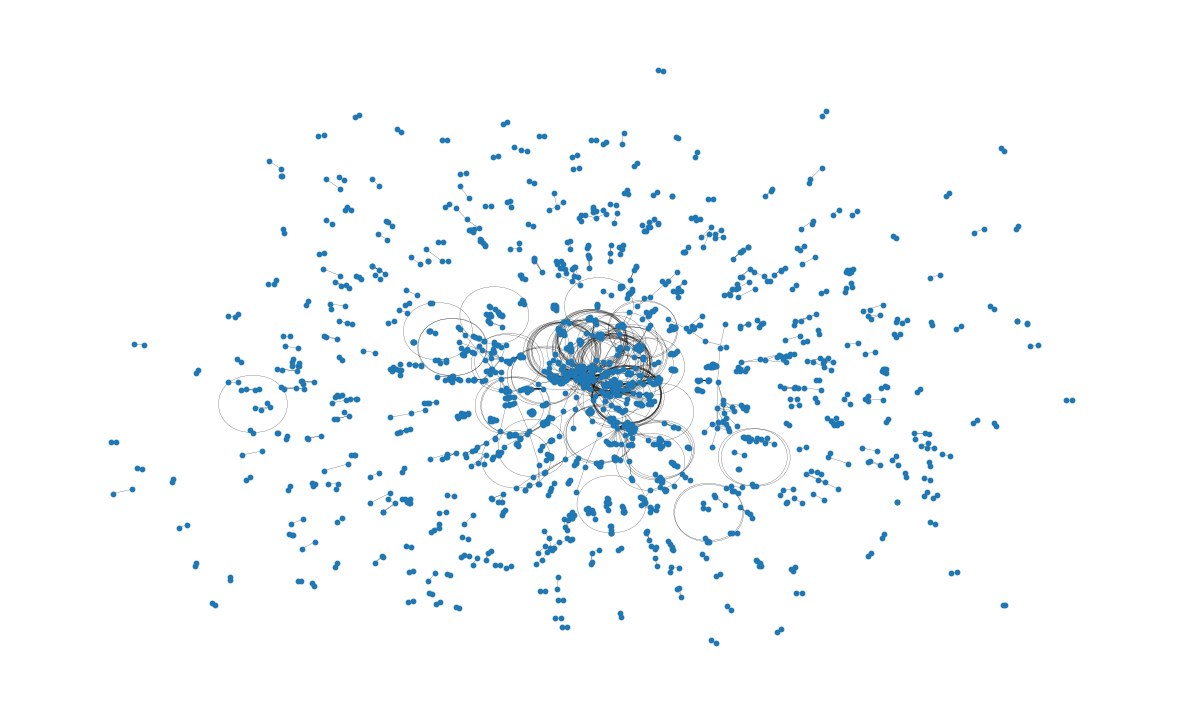

In [18]:
# Plot graph
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [19]:
loops = list(nx.selfloop_edges(G))
G.remove_edges_from(loops)

In [20]:
G = nx.Graph()

for pair in pairs:
    product1, product2 = pair
    score = pairs[pair]

    # The edge is only created when the score is high enough
    if score >= 5:
        G.add_edge(product1, product2, weight=score)

print("Total number of graph nodes:", G.number_of_nodes())
print("Total number of graph edges:", G.number_of_edges())

Total number of graph nodes: 1809
Total number of graph edges: 4618


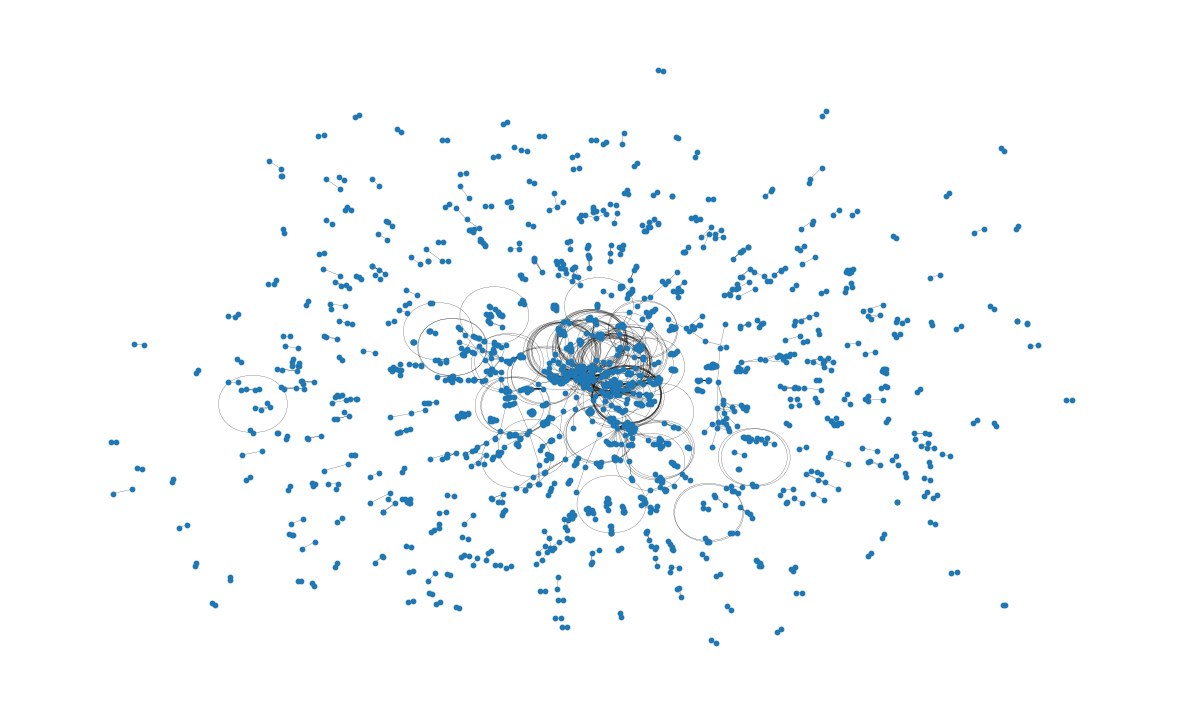

In [21]:
# Plot graph
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [22]:
#pip install --upgrade scipy gensim
#!pip install scipy==1.10.1

In [23]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=7, walk_length=20, num_walks=50, p=2, q=1, workers=1)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

C:\Users\camil\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Computing transition probabilities:   0%|          | 0/1809 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:08<00:00,  5.60it/s]


In [24]:
model.wv.index_to_key[0]

'B0049ZCF9G'

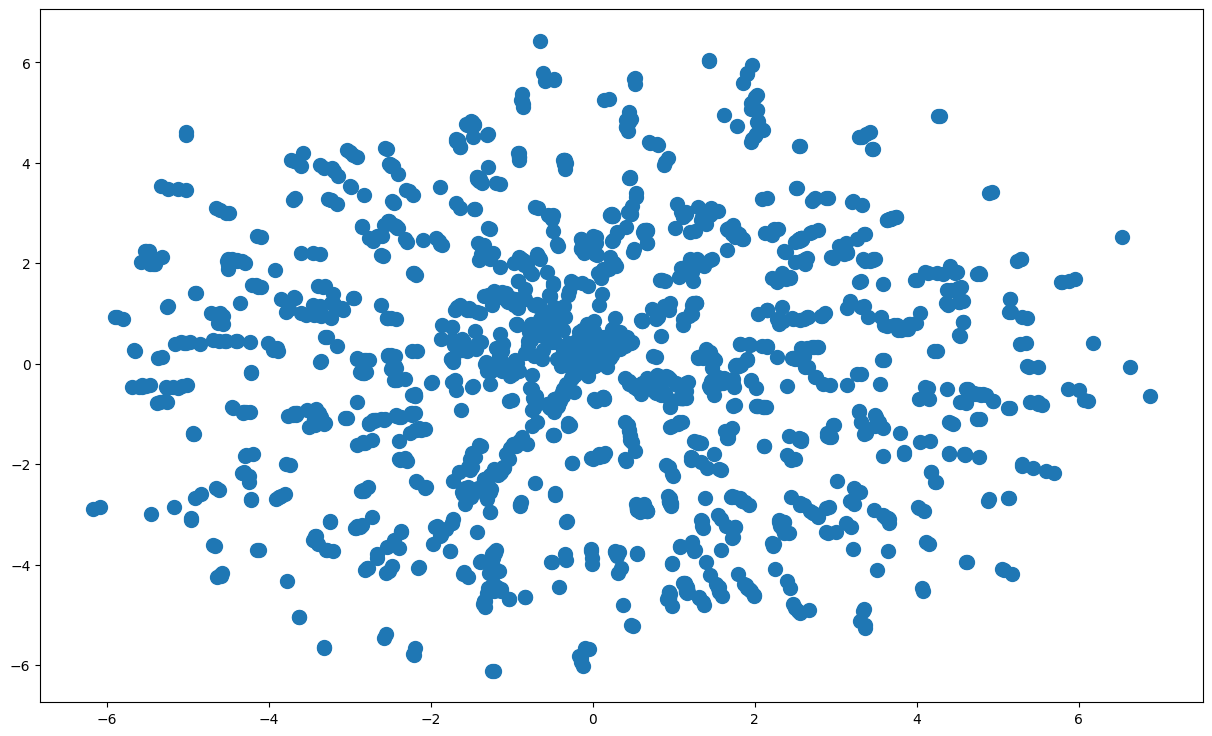

In [25]:
from sklearn.decomposition import PCA

nodes_wv = np.array([model.wv.get_vector(str(i)) for i in model.wv.index_to_key])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(nodes_wv)

plt.figure(figsize=(15, 9))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=100)
plt.show()

In [26]:
print("Number of nodes in model:", len(model.wv.index_to_key))
print("Vector for first node:", model.wv.get_vector(model.wv.index_to_key[0]))

Number of nodes in model: 1809
Vector for first node: [-1.4178354  -0.27803418 -3.1249382   0.340901    1.3700131  -0.09986284
  2.3859465 ]


In [27]:
ratings_test = ratings.drop(ratings2.index)
ratings_test = ratings_test.sample(n=52000, random_state=42)
ratings_test

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
220843,220844,B001ESN9IM,A3NA2W8HRDSA4Y,D. Chambers,2,2,5,2008-12-26,Giant Cahews,I was very surprised by this when we opened it...,1.0
6914,6915,B001LG945O,ANKQGTXHREOI5,Titanium Lili,1,1,4,2009-02-28,Tasty alternative to the usual sodas,I'm a big fan of avoiding corn syrup and a lot...,1.0
298172,298173,B004C9PTCE,A6T77XEYHI5KE,jandrpopejoy,7,7,5,2011-07-18,Hotter than Hades!,This stuff is super hot! That's what my family...,1.0
378735,378736,B008YA1LQK,A2HGUNLVHJYSCW,K. J. T.,0,0,5,2012-01-13,Just right,"Not too dark, not too light, not too harsh and...",0.0
487104,487105,B000PDWBKO,A2AWUM32L783DJ,"D. Sutton ""Movie n' game lover""",0,0,5,2011-03-13,Great Tasting popcorn! Sooo much better than ...,It seems all of our friends and family are so ...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
359561,359562,B007M832YY,A3H0NUX772TWVF,SB,0,0,5,2011-03-11,Delicious low fat treat.,Popchips are the best find I have found in a l...,0.0
323281,323282,B000OQ2DL4,A36U6FEHSQY17X,L. Shick,3,3,5,2012-09-11,Hooked on this!,"I'm a huge skeptic, but after 6 months of dail...",1.0
307873,307874,B001BS4G6O,ANJ0Z8D61FT0L,Sandra Brody,0,0,5,2010-12-23,Great Product,Look no further. Buy this product. If you ha...,0.0
244930,244931,B002C6DYAI,A1D63XUT0CG2WK,Bonsai man in Charlotte,1,1,5,2010-10-26,Great product at an affordable price,I highly recommend purchasing japanese red map...,1.0


In [28]:
def cosine_similarity_score(product1_id, product2_id, model):
    product1_vector = model.wv[str(product1_id)]
    product2_vector = model.wv[str(product2_id)]
    return cosine_similarity([product1_vector], [product2_vector])[0][0]

def evaluate_cosine_similarity(model, data, threshold=0.5):
    correct = 0
    total = 0
    for _, row in data.iterrows():
        product1 = str(row['ProductId1'])
        product2 = str(row['ProductId2'])
        if product1 in model.wv and product2 in model.wv:
            score = cosine_similarity_score(product1, product2, model)
            if score > threshold:
                correct += 1
            total += 1
    return correct / total if total > 0 else 0

In [31]:
# Dividir los datos en conjunto de entrenamiento y conjunto de validación y prueba
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

train_data, temp_data = train_test_split(ratings, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Generar pares de productos
def generate_pairs(data):
    pairs = []
    for user, group in data.groupby("UserId"):
        products = list(group["ProductId"])
        pairs.extend(list(combinations(products, 2)))
    return pd.DataFrame(pairs, columns=['ProductId1', 'ProductId2'])

val_data_pairs = generate_pairs(val_data)
test_data_pairs = generate_pairs(test_data)

# Definir la función de similitud de coseno
def cosine_similarity_score(product1_id, product2_id, model):
    product1_vector = model.wv[str(product1_id)]
    product2_vector = model.wv[str(product2_id)]
    return cosine_similarity([product1_vector], [product2_vector])[0][0]

# Evaluar la similitud de coseno en un conjunto de datos
def evaluate_cosine_similarity(model, data, threshold=0.5):
    correct = 0
    total = 0
    for _, row in data.iterrows():
        product1 = str(row['ProductId1'])
        product2 = str(row['ProductId2'])
        if product1 in model.wv and product2 in model.wv:
            score = cosine_similarity_score(product1, product2, model)
            if score > threshold:
                correct += 1
            total += 1
    return correct / total if total > 0 else 0

# Evaluar el modelo
val_accuracy = evaluate_cosine_similarity(model, val_data_pairs)
test_accuracy = evaluate_cosine_similarity(model, test_data_pairs)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.8842
Test Accuracy: 0.8731


In [34]:
import random

# Función para generar pares de productos comprados por el mismo usuario
def generate_pairs(data, negative_sampling_ratio=1.0):
    pairs = []
    for user, group in data.groupby("UserId"):
        products = list(group["ProductId"])
        pairs.extend(list(combinations(products, 2)))  # Genera todas las combinaciones posibles de productos
    
    # Generar ejemplos negativos
    negative_pairs = []
    product_ids = data['ProductId'].unique()
    for _ in range(int(len(pairs) * negative_sampling_ratio)):
        prod1, prod2 = random.sample(list(product_ids), 2)
        if prod1 != prod2:
            negative_pairs.append((prod1, prod2))
    
    pairs_df = pd.DataFrame(pairs, columns=['ProductId1', 'ProductId2'])
    negative_pairs_df = pd.DataFrame(negative_pairs, columns=['ProductId1', 'ProductId2'])
    pairs_df['label'] = 1
    negative_pairs_df['label'] = 0
    
    return pd.concat([pairs_df, negative_pairs_df], ignore_index=True)

# Dividir los datos en conjunto de entrenamiento y conjunto de validación y prueba
train_data, temp_data = train_test_split(ratings, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Generar pares de productos para validación y prueba, incluyendo ejemplos negativos
val_data_pairs = generate_pairs(val_data)
test_data_pairs = generate_pairs(test_data)

# Definir la función de similitud de coseno
def cosine_similarity_score(product1_id, product2_id, model):
    product1_vector = model.wv[str(product1_id)]
    product2_vector = model.wv[str(product2_id)]
    return cosine_similarity([product1_vector], [product2_vector])[0][0]

# Evaluar la similitud de coseno en un conjunto de datos
def evaluate_cosine_similarity(model, data, threshold=0.5):
    correct = 0
    total = 0
    for _, row in data.iterrows():
        product1 = str(row['ProductId1'])
        product2 = str(row['ProductId2'])
        if product1 in model.wv and product2 in model.wv:
            score = cosine_similarity_score(product1, product2, model)
            if (score > threshold and row['label'] == 1) or (score <= threshold and row['label'] == 0):
                correct += 1
            total += 1
    return correct / total if total > 0 else 0

# Evaluar el modelo
val_accuracy = evaluate_cosine_similarity(model, val_data_pairs)
test_accuracy = evaluate_cosine_similarity(model, test_data_pairs)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.8811
Test Accuracy: 0.8696
